In [ ]:
#default_exp graph_datasets

In [ ]:
#hide_output
%load_ext autoreload
%autoreload 2

# Graph datasets
> Various real-life large graphs and their characteristics used in [Related works](02_related.ipynb)

Imports SciPy modules and matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Other imports

In [ ]:
import io

##  Datasets from FELINE (`table_fel`)

"Reachability Queries in Very Large Graphs: A Fast Refined Online Search Approach" (2014)  
http://openprocedings.org/EDBT/2014/paper_166.pdf

![Table 1: Datasets](images/feline/FELINE_paper-table_1-datasets-with_caption.png)

- _vertices_ - $|V|$, number of vertices / nodes in the graph
- _edges_ - $|E|$, number of edges in the graph
- _Cluster-coeff_ - clustering coefficient
- _Eff-diameter_ - effective diameter (or effective eccentricity) is an estimated size of the path in which 90% of all pairs of vertices connected are reachable from each other
- _roots_ - number of roots, nodes with no incoming edges, vertices with no predecessors (sources)
- _leafs_ - number of leafs, nodes with no outgoing edges (sinks)

The FELINE paper authors used the SNAP software <snap.stanford.edu/snap/> to compute these values

In [ ]:
#@title Table 1: Datasets from FELINE (table_fel) { form-width: "25%" }

csv=u"""Graph;vertices;edges;Cluster coeff.;Eff. diameter;roots;leafs
arXiv;6000;66707;0.35;5.48;961;624
Yago;6642;42392;0.24;6.57;5176;263
Go;6793;13361;0.07;10.92;64;3087
Pubmed;9000;40028;0.10;6.32;2609;4702
citeseer;10720;44258;0.28;8.36;4572;1868
Uniprot22m;1595444;1595442;0.00;3.3;1556157;1
Cit-patents;3774768;16518047;0.09;10.5;515785;1685423
citeseerx;6540401;15011260;0.06;8.4;567149;5740710
Go-uniprot;6967956;34770235;0.00;4.8;6945721;4
Uniprot100m;16087295;16087293;0.00;4.1;14598959;1
Uniprot150m;25037600;25037598;0.00;4.4;21650056;1
"""
csv_stream = io.StringIO(csv)

table_fel=pd.read_csv(csv_stream,sep=';',index_col=0)
table_fel.insert(loc=2,column='edges[% V^2]',
               value=100.0*(table_fel['edges']/(table_fel['vertices']**2)))
table_fel.insert(loc=3,column='edges/vertices',
               value=table_fel['edges']/table_fel['vertices'])
table_fel

,vertices,edges,edges[% V^2],edges/vertices,Cluster coeff.,Eff. diameter,roots,leafs
Graph,,,,,,,,
arXiv,6000,66707,0.185297,11.117833,0.35,5.48,961,624
Yago,6642,42392,0.096092,6.382415,0.24,6.57,5176,263
Go,6793,13361,0.028954,1.966878,0.07,10.92,64,3087
Pubmed,9000,40028,0.049417,4.447556,0.10,6.32,2609,4702
citeseer,10720,44258,0.038513,4.128545,0.28,8.36,4572,1868
Uniprot22m,1595444,1595442,0.000063,0.999999,0.00,3.30,1556157,1
Cit-patents,3774768,16518047,0.000116,4.375911,0.09,10.50,515785,1685423
citeseerx,6540401,15011260,0.000035,2.295159,0.06,8.40,567149,5740710
Go-uniprot,6967956,34770235,0.000072,4.990019,0.00,4.80,6945721,4


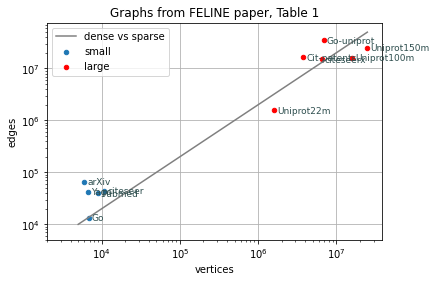

In [ ]:
ee=np.geomspace(5000,25000000,num=10)
ax=table_fel[table_fel['vertices'] < 100000].plot.scatter(x='vertices',y='edges',
                          logx=True,logy=True,
                          grid=True,label='small',
                          title='Graphs from FELINE paper, Table 1')
ax=table_fel[table_fel['vertices'] >= 100000].plot.scatter(ax=ax,x='vertices',y='edges',
                          logx=True,logy=True,
                          grid=True,c='red',label='large',
                          title='Graphs from FELINE paper, Table 1')
ax.plot(ee,2*ee,'-',label='dense vs sparse',c='gray')
for row in table_fel.itertuples():
    ax.annotate(row[0], xy=(row.vertices,row.edges),
                xytext=(3,-3), textcoords='offset points',horizontalalignment='left',
                family='sans-serif', fontsize=9, color='darkslategrey')
ax.set_xlim(left  =2e3)
ax.set_ylim(bottom=5e3)
plt.legend(loc='upper left')
#plt.savefig('feline_graphs_vertices_vs_edges.pdf')
plt.show()

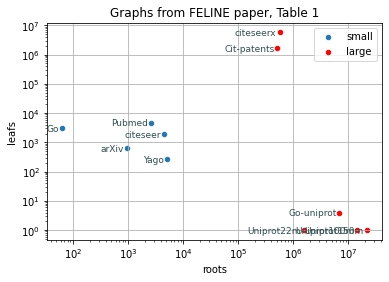

In [ ]:
ax=table_fel[table_fel['vertices'] < 100000].plot.scatter(x='roots',y='leafs',
                          logx=True,logy=True,
                          grid=True,label='small',
                          title='Graphs from FELINE paper, Table 1')
ax=table_fel[table_fel['vertices'] >= 100000].plot.scatter(ax=ax,x='roots',y='leafs',
                          logx=True,logy=True,
                          grid=True,c='red',label='large',
                          title='Graphs from FELINE paper, Table 1')
for row in table_fel.itertuples():
    ax.annotate(row[0], xy=(row.roots,row.leafs),
                xytext=(-3,-3), textcoords='offset points',horizontalalignment='right',
                family='sans-serif', fontsize=9, color='darkslategrey')
plt.show()

## Datasets from FERRARI (`table_fer`)

"FERRARI: Flexible and Efficient Reachability Range Assignment for Graph Indexing" (2013)  
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.365.2894&rep=rep1&type=pdf

<!-- ![Table 2. Datasets used](images/ferrari/FERRARI_arXiv-table_2-datasets_used-with_caption.png) -->
![Table 1. Datasets used](images/ferrari/FERRARI_paper-table_1-datasets_used-with_caption.png)

- $|V|$ - number of vertices (nodes)
- $|E|$ - number of edges
- $|V_C|$, $|E_C|$ - number of, respectively, vertices and edges in the _condensed graph_, where maximial strongly connected components were collapsed into "supernodes", i.e. directed acyclic graph (DAG) created from given graph

In [ ]:
#@title Table 1: Datasets Used from FERRARI (table_fer) { form-width: "25%" }

csv=u"""Graph;type;vertices;edges
arXiv;small, dense;6000;66707
Go;small, dense;6793;13361
Pubmed;small, dense;9000;40028
Human;small, sparse;38811;39816
citeseer;large;693947;312383
Cit-patents;large;3774768;16518047
citeseerx;large;6540401;15011260
Go-uniprot;large;6967956;34770235
GovWild;RDF;80222880;23652610
Yago2;RDF;16375503;25908132
Twitter;social network;18121168;18359487
Web-UK;web graph;22753644;38184039
"""
csv_stream = io.StringIO(csv)

table_fer=pd.read_csv(csv_stream,sep=';',index_col=0)
table_fer.insert(loc=3,column='edges/vertices',
               value=table_fer['edges']/table_fer['vertices'])
table_fer

,type,vertices,edges,edges/vertices
Graph,,,,
arXiv,"small, dense",6000,66707,11.117833
Go,"small, dense",6793,13361,1.966878
Pubmed,"small, dense",9000,40028,4.447556
Human,"small, sparse",38811,39816,1.025895
citeseer,large,693947,312383,0.450154
Cit-patents,large,3774768,16518047,4.375911
citeseerx,large,6540401,15011260,2.295159
Go-uniprot,large,6967956,34770235,4.990019
GovWild,RDF,80222880,23652610,0.294836


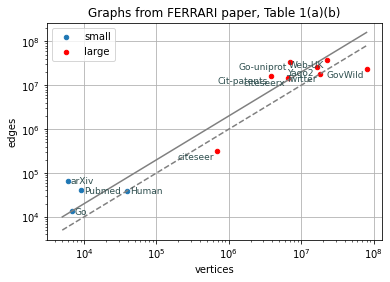

In [ ]:
ee=np.geomspace(5000,80000000,num=10)
ax=table_fer[table_fer['vertices'] < 100000].plot.scatter(x='vertices',y='edges',
                          logx=True,logy=True,
                          grid=True,label='small',
                          title='Graphs from FERRARI paper, Table 1(a)(b)')
ax=table_fer[table_fer['vertices'] >= 100000].plot.scatter(ax=ax,x='vertices',y='edges',
                          logx=True,logy=True,
                          grid=True,c='red',label='large',
                          title='Graphs from FERRARI paper, Table 1(a)(b)')
ax.plot(ee,ee,'--',ee,2*ee,'-',label='dense vs sparse',c='gray')
for row in table_fer[table_fer['vertices'] < 100000].itertuples():
    ax.annotate(row[0], xy=(row.vertices,row.edges),
                xytext=(3,-3), textcoords='offset points',horizontalalignment='left',
                family='sans-serif', fontsize=9, color='darkslategrey')
    #print(row)
for row in table_fer[table_fer['vertices'] >= 100000].itertuples():
    ax.annotate(row[0], xy=(row.vertices,row.edges),
                xytext=(-3,-8), textcoords='offset points',horizontalalignment='right',
                family='sans-serif', fontsize=9, color='darkslategrey')
plt.show()

## Datasets from PReaCH (`table_rch`)

"PReaCH: A Fast Lightweight Reachability Index using Pruning and Contraction Hierarchies" (2014)  
https://arxiv.org/abs/1404.4465

![Table 1: Headers](images/preach/PReaCH_arXiv-table_1-datasets_used-header.png)  
![Table 1: Instances used for our experiments. _d_ is the maximal path length.](images/preach/PReaCH_arXiv-table_1-datasets_used-real_graphs-no_caption.png)

- $m/n$ - edge density, number of edges divided by number of nodes (vertices)
- $d$ - length of the longest path, or maximal path length
- % pos - the fraction of positive queries in a random sample of 100000 queries

In [ ]:
#@title Table 1: Instances used for experimets from PReaCH (table_rch) { form-width: "25%" }

csv=u"""Graph;type;vertices;edges;edges/vertices;maxlevel;r-score
arXiv;small, dense;6000;66707;11.12;167;0.15
citeseer-sub;small, dense;11000;44000;4.13;36;0.004
Go;small, dense;6793;13361;1.97;16;0.002
Pubmed;small, dense;9000;40028;4.45;19;0.007
Yago;small, dense;6642;42392;6.38;13;0.002
agrocyc;small, sparse;13000;14000;1.07;16;0.001
amaze;small, sparse;3710;3947;1.06;16;0.17
anthra;small, sparse;12000;13000;1.07;16;0.001
ecoo;small, sparse;13000;14000;1.08;22;0.001
Human;small, sparse;38811;39816;1.01;18;0.000
kegg;small, sparse;3617;4395;1.22;26;0.20
mtbrv;small, sparse;9602;10000;1.09;22;0.002
nasa;small, sparse;5605;6538;1.17;35;0.006
vchocyc;small, sparse;9491;10000;1.09;21;0.001
xmark;small, sparse;6080;7051;1.16;38;0.014
citeseer;large;693947;312383;0.45;13;0.000
citeseerx;large;6540401;15011260;2.30;59;0.002
Cit-patents;large;3774768;16518047;4.38;32;0.001
Go-uniprot;large;6967956;34770235;4.99;21;0.000
Uniprot22m;large;1595444;1595442;1.00;4;0.000
Uniprot100m;large;16087295;16087293;1.00;9;0.000
Uniprot150m;large;25037600;25037598;1.00;10;0.000
email-EuAll;stanford;231000;223000;0.97;7;0.05
p2p-Gnutella31;stanford;48000;55000;1.15;14;0.008
soc-LiveJournal1;stanford;971000;1024000;1.05;24;0.21
web-Google;stanford;372000;518000;1.39;34;0.15
wiki-Talk;stanford;2282000;2312000;1.01;8;0.008
"""
csv_stream = io.StringIO(csv)

table_rch=pd.read_csv(csv_stream,sep=';',index_col=0)
print(table_rch['type'].unique())
table_rch

['small, dense' 'small, sparse' 'large' 'stanford']


,type,vertices,edges,edges/vertices,maxlevel,r-score
Graph,,,,,,
arXiv,"small, dense",6000,66707,11.12,167,0.150
citeseer-sub,"small, dense",11000,44000,4.13,36,0.004
Go,"small, dense",6793,13361,1.97,16,0.002
Pubmed,"small, dense",9000,40028,4.45,19,0.007
Yago,"small, dense",6642,42392,6.38,13,0.002
agrocyc,"small, sparse",13000,14000,1.07,16,0.001
amaze,"small, sparse",3710,3947,1.06,16,0.170
anthra,"small, sparse",12000,13000,1.07,16,0.001
ecoo,"small, sparse",13000,14000,1.08,22,0.001


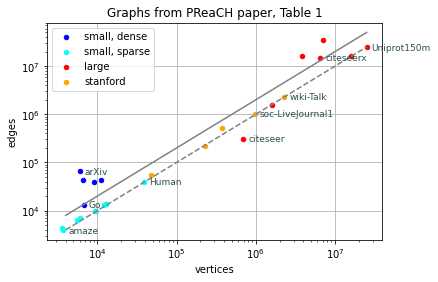

In [ ]:
ee=np.geomspace(4000,25000000,num=10)
ax=plt.gca()
types =table_rch['type'].unique()
colors=('blue', 'cyan', 'red', 'orange')
for i, t in enumerate(types):
  ax=table_rch[table_rch['type'] == t].plot.scatter(x='vertices',y='edges',ax=ax,
                                                    logx=True,logy=True,grid=True,
                                                    label=t,c=colors[i],
                                                    title='Graphs from PReaCH paper, Table 1')
ax.plot(ee,ee,'--',ee,2*ee,'-',label='dense vs sparse',c='gray')
ann=('Uniprot150m','soc-LiveJournal1','wiki-Talk','Go','amaze','arXiv','Human','citeseer','citeseerx')
for g in ann:
  row = table_rch.loc[g]
  ax.annotate(g, xy=(row['vertices'],row['edges']),
              xytext=(5,-3), textcoords='offset points',horizontalalignment='left',
              family='sans-serif', fontsize=9, color='darkslategrey')
plt.show()